In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
#read data


df=pd.read_csv("steps_p01.csv", parse_dates=[1], index_col=1, squeeze=True, date_parser=parser)

In [4]:
df_copy=df.drop(labels = ["Participant_ID"], axis=1)

In [5]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='Dates'>

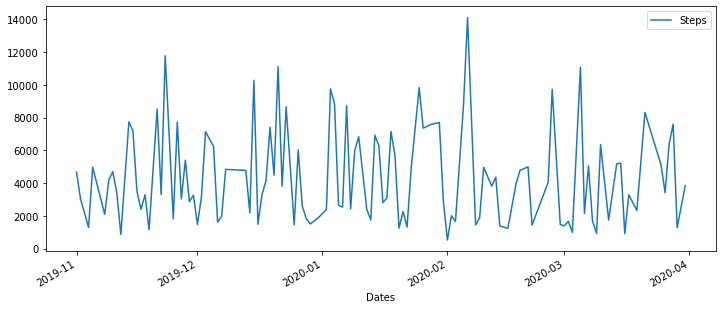

In [6]:
df_copy.plot(figsize=(12,5))

In [7]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [8]:
# Daily Steps

adf_test(df_copy)

1. ADF :  -10.766997253070219
2. P-Value :  2.438222734005813e-19
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 116
5. Critical Values :
	 1% :  -3.4880216384691867
	 5% :  -2.8867966864160075
	 10% :  -2.5802408234244947


In [9]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
stepwise_fit = auto_arima(df_copy, 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  117
Model:                        SARIMAX   Log Likelihood               -1097.521
Date:                Sat, 21 May 2022   AIC                           2199.042
Time:                        18:05:54   BIC                           2204.567
Sample:                             0   HQIC                          2201.285
                                - 117                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4365.1966    334.512     13.049      0.000    3709.565    5020.828
sigma2      8.229e+06   1.28e+06      6.440      0.000    5.72e+06    1.07e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                16.66
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                             0.92
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
X = df_copy.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:]
history = [x for x in train]
arima_order = (0,0,0)
sarima_order = (0,0,0,365)
predictions = list()

In [15]:
import statsmodels.api as sm

In [20]:
model = sm.tsa.statespace.SARIMAX(history, order=arima_order, seasonal_order = sarima_order)
model_fit = model.fit()

In [21]:
for t in range(len(test)):
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
    


In [22]:
predictions


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]